In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
train_dataset = dsets.MNIST(root="./data",
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

In [3]:
len(train_dataset)

60000

1


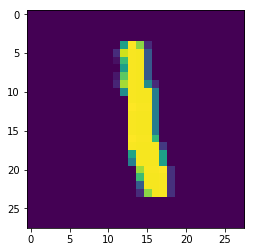

In [4]:
show_img = train_dataset.train_data[6].numpy().reshape(28,28)
label = train_dataset.train_labels[6]
print(label)
plt.imshow(show_img)


In [5]:
test_dataset = dsets.MNIST("./data",
                          train=False,
                          transform = transforms.ToTensor(),
                          download=True)

In [6]:
len(test_dataset)

10000

9


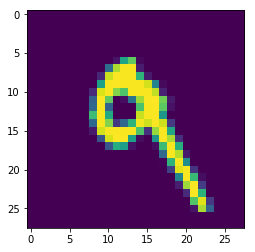

In [7]:
show_img = test_dataset.test_data[7].numpy().reshape(28,28)
label = test_dataset.test_labels[7]
print(label)
plt.imshow(show_img)


In [8]:
test_dataset.test_data[1].size()

torch.Size([28, 28])

In [9]:
batch_size=100
n_iters=3000
num_epochs = n_iters / (len(train_dataset)/batch_size)
print(num_epochs)

5.0


In [10]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size = batch_size,
                                          shuffle=True)


test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size = batch_size,
                                          shuffle=False)

In [11]:
import collections

In [12]:
isinstance(train_loader, collections.Iterable)

True

In [13]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1= nn.ReLU()
        
        self.avgpool1 = nn.AvgPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2= nn.ReLU()
        
        self.avgpool2 = nn.AvgPool2d(kernel_size=2)
        
        self.fc1 = nn.Linear(32*7*7, 10)
                
        
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        
        out = self.avgpool1(out)
        
        
        
        out = self.cnn2(out)
        out = self.relu2(out)
        
        out = self.avgpool2(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        
        
        return out
        

In [14]:
input_dim = 28*28
hidden_size=100
output_dim = 10
model = CNNModel()

In [15]:
criterion = nn.CrossEntropyLoss()

In [16]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
print(list(model.parameters())[0].size())
print(list(model.parameters())[1].size())

torch.Size([16, 1, 5, 5])
torch.Size([16])


In [18]:
iter = 0
for epoch in range(int(num_epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        
        outputs = model(images)
        
        loss = criterion(outputs, labels)
              
        loss.backward()
        optimizer.step()
              
        
        iter = iter + 1
        if (iter % 500 ==0):
              correct = 0.0
              total = 0.0 
              for i, (images, labels) in enumerate(test_loader):
                  images = Variable(images)
                  outputs = model(images)
                  labels2 = Variable(labels)
                  _, predicted = torch.max(outputs, 1)
                  total += labels.size(0) 
                  correct += (predicted.data == labels).sum()
                  
              if(iter==500):
                    print("this is iteration 500")
                    print(outputs[0,:])
              #print("Correct: {} ".format(correct))
              #print("Total: {}".format(total))
              accuracy = 100.0 * correct*1.0/(1.0*total)
              print("Iteration:{}, Loss:{},accuracy:{}".format(iter, loss.data, accuracy) )
                
                    
        
        
        
        
        

this is iteration 500
Variable containing:
-1.8183
 2.3970
 0.1552
 0.4631
-1.4345
 1.1217
-0.2006
-1.1049
 2.9880
-0.3257
[torch.FloatTensor of size 10]

Iteration:500, Loss:
 0.5562
[torch.FloatTensor of size 1]
,accuracy:85.64
Iteration:1000, Loss:
 0.4541
[torch.FloatTensor of size 1]
,accuracy:88.68
Iteration:1500, Loss:
 0.2220
[torch.FloatTensor of size 1]
,accuracy:90.05
Iteration:2000, Loss:
 0.2723
[torch.FloatTensor of size 1]
,accuracy:91.17
Iteration:2500, Loss:
 0.2473
[torch.FloatTensor of size 1]
,accuracy:92.26
Iteration:3000, Loss:
 0.2743
[torch.FloatTensor of size 1]
,accuracy:92.87


OUTPUTS
torch.Size([100, 10])
Variable containing:
 2.4622
-7.6778
-1.3937
 1.8183
 2.1837
 7.3400
-0.5049
-2.1394
-0.0161
 0.5408
[torch.FloatTensor of size 10]

PREDICTED
5
LABELS
5


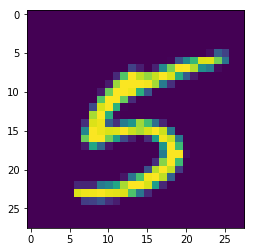

In [19]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size = batch_size,
                                          shuffle=False)

image_num=52
iter_test=0
for i, (images, labels) in enumerate(test_loader):
     iter_test+=1
     
     images = Variable(images)
     
     outputs = model(images)
     plt.imshow(images.data[image_num].numpy().reshape(28,28))
     labels2 = Variable(labels)
     _, predicted = torch.max(outputs, 1)
     if(iter_test==1):
        print("OUTPUTS")
        print(outputs.size())
        
        print(outputs[image_num,:])
        _, predicted = torch.max(outputs.data,1)
        print("PREDICTED")
        print(predicted[image_num])
        print("LABELS")
        print(labels[image_num])
        break
        
    

In [20]:

\